# Argentina Programa 4.0 | Modulo 2 Ciencia de Datos

# Clustering | Agrupamiento de datos

El *clustering* es un conjunto de técnicas y métodos de aprendizaje no supervisado. Nos ayuda a *clasificar* o particionar en grupos (*clusters*) a un conjunto de datos.

Al igual que con las técnicas que vimos de reducción de dimensionalidad, decimos que es *no supervisado* porque no tenemos nuestros datos previamente etiquetados. Estos algoritmos buscan posibles agrupaciones de los datos y/o patrones ocultos sin necesidad alguna de intervención humana.

Luego de particionar a los datos en *grupos* la idea es que las observaciones (datos) dentro de un mismo grupo sean más similares entre sí, mientras que las observaciones (datos) de diferentes grupos sean muy diferentes entre ellas.  

Esto es extremadamente útil en una serie de escenarios:

* Para la segmentación de clientes
* Para el análisis exploratorio de datos
* Como técnica de reducción de la dimensionalidad
* Para la detección de anomalías (también llamada detección de *outliers*)
* Para el aprendizaje semi-supervisado
* Para los motores de búsqueda
* Para segmentar una imagen



## K-means

K-means es uno de los métodos mas populares (y rápidos!). Es un  algoritmo de agrupamiento (clustering) particional. Esto quiere decir que como resultado vamos a obtener *particiones* de los datos. Estos son nuestros *grupos* tambien llamados *clusters*.

K-means es simple, y elegante. Busca particionar o repartir los datos en *k* grupos no solapados (o disjuntos, esto quiere decir que un dato no puede pertenecer a más de un grupo o cluster).

Para ejecutar K-means tenemos que especificar el número `k`, y el algoritmo va a asignar los datos exactamente a cada uno de estos `k` grupos.

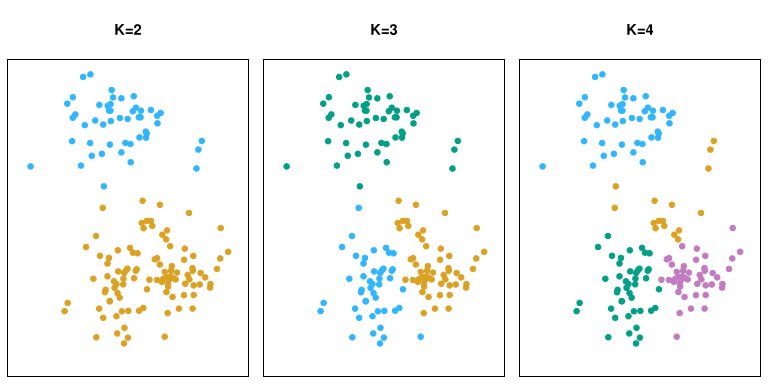

Datos simulados, agrupados mediante el algoritmo k-means con diferentes valores de *k*. Los clusters (grupos) están coloreados arbitrariamente. Figura tomada de: [Introduction to Statistical Learning, 2nd Edition](https://www.statlearning.com/)

### Fundamento del método

Para particionar los datos en `k` *grupos* la idea es que las observaciones (datos) dentro de un mismo grupo sean más similares entre sí, mientras que las observaciones (datos) de diferentes grupos sean muy diferentes entre ellas.  

Como se hace? Vamos a ilustrarlo primero paso a paso:

1) Nuestros datos, sin agrupar

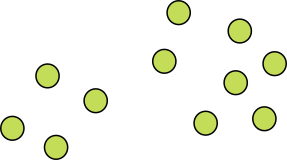

2) Para `k=2` el algoritmo K-means genera 2 observaciones (datos) al azar. Estos son nuestros *centroides*

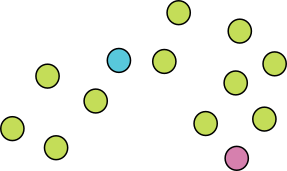

3) K-means calcula las *distancias* entre cada dato hacia cada centroide. Si un dato está más cerca del centroide *celeste*, se asigna a ese grupo. Si está más cerca del centroide *rosa* se asigna a ese otro grupo.

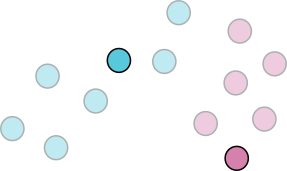

4) K-means mueve el centroide de cada grupo al centro geométrico del grupo.

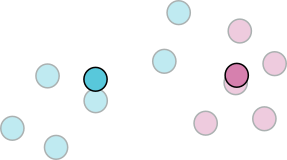

5) K-means re-calcula las distancias de cada dato a cada centroide. Si un dato está mas cerca del centroide *celeste* queda dentro del grupo celeste. Si el dato está más cerca de otro centroide, se agrupa en ese otro grupo.

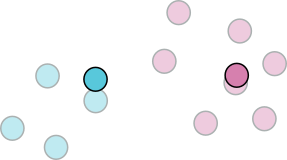


6) K-means vuelve a iterar los pasos 4 y 5 hasta convergencia (no hay más reasignación de datos a grupos).

En los pasos 3 y 5 (asignación de datos a clusters) K-means usa la *distancia* de cada dato a cada centroide. Pero cómo se mide esa distancia?

Una manera de medir distancias es usar la distancia Euclidea (geométrica), que mide la distancia en X y en Y entre dos puntos:

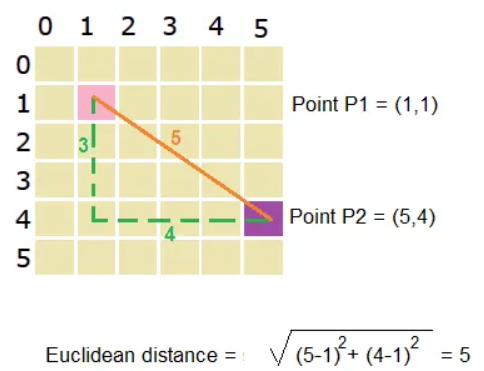

### Demo interactivo

Web demo: http://alekseynp.com/viz/k-means.html

Esto es solamente para *visualizar* o ver como funciona el algoritmo. No tiene código para ejecutar.

# K-means con Python (sklearn)

Ahora vamos a ver como hacer clustering con K-means en Python. Para eso vamos a usar el módulo SciKit Learn (`sklearn`) y dentro de este módulo, en particular vamos a usar la función  `cluster.KMeans()`

Referencias:
 - [Scikit Learn: Machine Learning in Python](https://scikit-learn.org/stable/index.html)
 - [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


## Datos

Para empezar, vamos a generarnos un conjunto de datos, con los que vamos a trabajar. Los vamos a generar *al azar* usando `numpy.random` y en particular los vamos a generar usando la función `standard_normal()` que hace un muestreo sobre una distribución normal (gaussiana) centrada en cero (0) y con una desviación estandar de uno (1).

[numpy.random.standard_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html)

In [ ]:
import numpy as np

np.random.seed(0) # para poder reproducir el ejemplo siempre igual

datos = np.random.standard_normal((50,2)) # 50 valores * 2 dimensiones (variables, columnas)
print(datos.shape)

# nuestro conjunto de datos tiene 50 observaciones (datos = filas)
# cada fila (dato) tiene dos valores (x = 1er columna, y = 2da columna)
print(datos)

Veamos los datos: podemos graficarlos, como histograma o como una nube de puntos. El histograma nos muestra la distribución de valores de las dos columnas (x e y). El grafico de puntos (scatter plot) nos muestra la ubicación en dos dimensiones de cada uno de los 50 datos (observaciones).

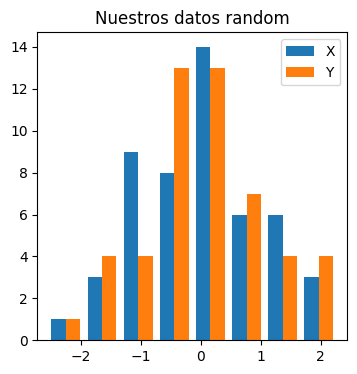

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(datos, bins=8)
ax.set_title("Nuestros datos random")
ax.legend(["X", "Y"])

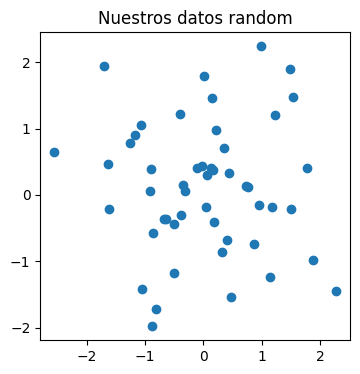

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(datos[:,0], datos[:,1]) # primer columna = x; segunda columna = y
ax.set_title("Nuestros datos random");

Ahora vamos a hacer un pequeño truco para *forzar* corrimientos en los datos. Vamos a hacer que las primeras 25 observaciones (datos) tengan un corrimiento de la media respecto a las ultimas 25 observaciones.




In [ ]:
# a las primeras 25 filas de x le sumamos 3
datos[:25,0] += 3

# a las primeras 25 filas de y le restamos 4
datos[:25,1] -= 4

Esto lo hacemos para intentar generar grupos de datos mas o menos bien separados. Veamos que hicimos...

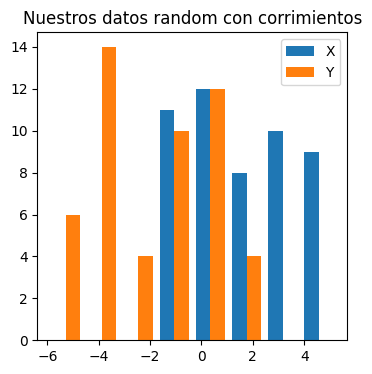

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(datos, bins=8)
ax.set_title("Nuestros datos random con corrimientos")
ax.legend(["X", "Y"])

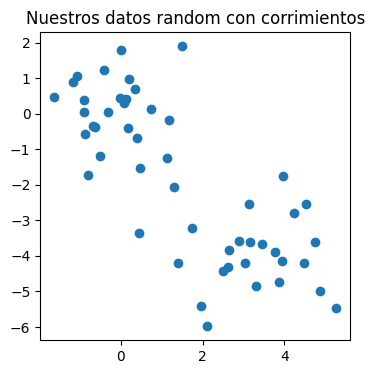

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(datos[:,0], datos[:,1]) # primer columna = x; segunda columna = y
ax.set_title("Nuestros datos random con corrimientos");

Todo esto fue preparatorio, lo único que hicimos hasta acá fue generar un set de datos aleatorio (completamente inventado, generado en la computadora) para poder trabajar y aprender técnicas de agrupamiento.

El paso a paso les queda para revisarlo y para que puedan *ver* exactamente qué fue lo que hicimos.

## Agrupando datos con K-means

Ahora si, vamos a usar `sklearn.cluster.kmeans()` sobre nuestros datos. Recordar que nuestro array de datos tiene 50 observaciones (datos), cada uno de los cuales consta de dos valores (x,y).  

In [ ]:
from sklearn.cluster import KMeans

# numero de clusters
k = 3

# usamos la funcion .fit() de KMeans
agrupamientos = KMeans(n_clusters = k, random_state = 2, n_init = 20).fit(datos)

# random state es para que todos obtengamos siempre los mismos resultados
# solo tiene sentido pedagogicamente!

# n_init es el numero de veces que corremos k-means
# en cada iteración se comienza con nuevos centroides!

In [ ]:
# las etiquetas (labels) contienen las particiones / clusters
# si, sklearn usa underscores al final de labels (labels_)
print(agrupamientos.labels_)

# verificar que tenemos el numero de asignaciones a clusters para todos los datos
print(agrupamientos.labels_.shape)


[1 0 1 1 0 0 1 0 1 1 2 1 1 2 0 0 2 2 0 2 2 0 2 2 2 2 2 0 0 2 2 2 1 2 2 1 1
 1 2 2 2 1 0 1 0 0 0 0 0 0]
(50,)


El método K-means agrupó las observaciones (datos) en dos clusters, aun cuando no le dimos ninguna información adicional sobre los grupos (solamente los valores x + y). Podemos graficar los datos nuevamente, ahora usando las etiquetas (`kmeans.labels_`) para colorear las asignaciones de cada according to its cluster assignment.



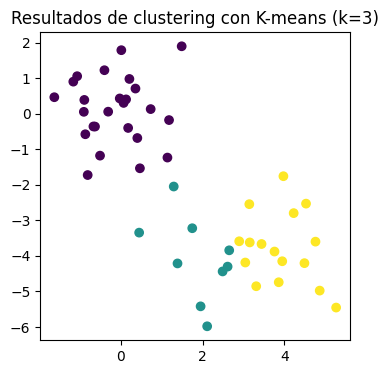

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(datos[:,0], datos[:,1], c=agrupamientos.labels_)
ax.set_title("Resultados de clustering con K-means (k=3)");

## K-means en casos más complejos

En este caso nosotros **sabíamos** de antemano que había dos clusters. Porque a partir de un muestreo aleatorio (nube de puntos en 2D sin estructura aparente), al hacer un corrimiento de la mitad de los datos hacia la derecha (x + 3) y hacia abajo (y - 4), *forzamos* que las dos mitades se separen en este espacio 2D.

En casos reales, normalmente desconocemos el número verdadero de grupos en los datos, ni sabemos si existe un número preciso de grupos. En estos casos, es usual correr K-means con distintos valores de `k`. Y luego evaluar el que mejor funciona.

Pero cómo evaluamos esto? Vamos a verlo con un ejemplo más complejo.

Para probarlo, vamos a armar otro dataset sintético (artificial). En este caso, para aprender otra manera de hacerlo, vamos a usar la función `make_blobs` de `sklearn` (además de que es más rápido!).

In [ ]:
from sklearn.datasets import make_blobs

x, y = make_blobs(
    n_samples = 500,
    n_features = 2, # x, y
    centers = 4,
    cluster_std = 1,
    center_box = (-10.0, 10.0),
    shuffle = True,
    random_state = 1, # para poder reproducir el ejemplo!
)

Estos parámetros generan un cluster bien distintivo y 3 clusters posicionados bastante juntos entre sí.

In [ ]:
x.shape

(500, 2)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(x, y=None):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)

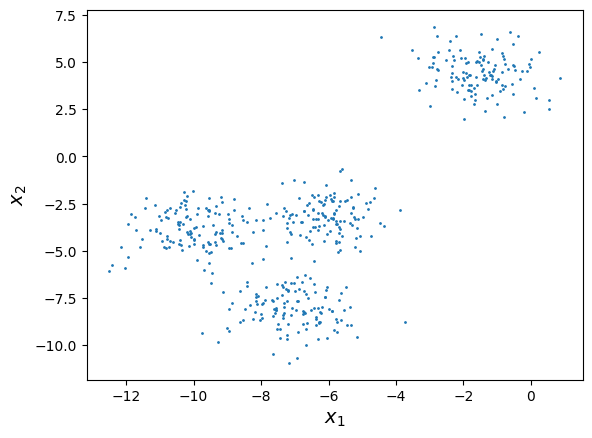

In [ ]:
plot_clusters(x)

Ahora hagamos agrupamientos usando K-means

In [ ]:
from sklearn.cluster import KMeans

# Hay que fijar de antemano el número de clusters que usaremos.
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10).fit(x)

Las etiquetas asignadas a cada dato quedan guardadas en el atributo `labels_`. El resultado es un array de numpy, podemos manipularlo como ya sabemos:

In [ ]:
clusters = kmeans.labels_
print(type(clusters))
print(clusters.shape)
print(np.unique(clusters))

<class 'numpy.ndarray'>
(500,)
[0 1 2 3]


También podemos recuperar los centros de los clusters (*centroides*) con el atributo `clusters_centers_`. Cada centro de clúster tiene dos coordenadas (en este ejemplo!)

In [ ]:
print('Coordendas de los centros de los clusters:')
print(kmeans.cluster_centers_)

Coordendas de los centros de los clusters:
[[ -1.54234022   4.43517599]
 [-10.00969056  -3.84944007]
 [ -6.08459039  -3.17305983]
 [ -7.09306648  -8.10994454]]


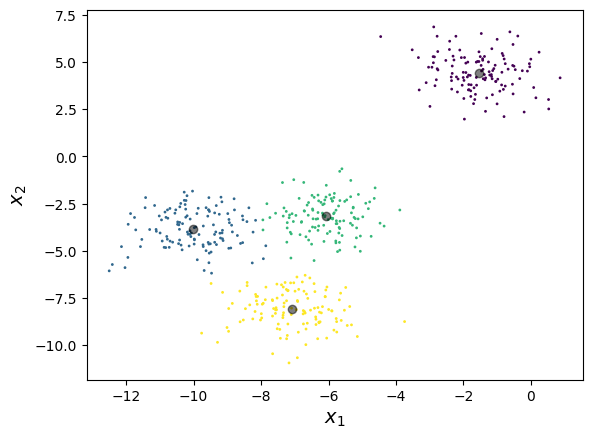

In [ ]:
# podemos plotear los clusters con sus centroides!
plot_clusters(x, kmeans.labels_)

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:,1], c='black', alpha=0.5)

## Fronteras de decisión

Las fronteras de decisión (decision boundaries) son posiciones en el espacio en las cuales el algoritmo no puede resolver el agrupamiento (un dato en esa posición es *equidistante* a dos centroides).

Las fronteras de decisión permiten también visualizar los agrupamientos como *mapas* de particiones en el espacio. Esto nos permite **ver** a qué partición o grupo pertenecerían datos que no vimos o conocemos todavía.

No vamos a entrar en detalles sobre como calcular estas fronteras de decisión, pero sepan que en el caso de Kmeans y otros algoritmos, estos son cálculos simples que pueden hacerse en forma genérica (les dejamos código escrito más abajo &ndash; oculto) y una referencia por si quieren leer más: [Easily visualize Scikit-learn models’ decision boundaries.](https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508)

In [ ]:
#@title Código para graficar fronteras de decisión
def plot_data(x, marker='.', color='k', ls='', markersize=2, **kwargs):
    plt.plot(x[:, 0], x[:, 1], marker=marker, ls=ls, color=color, markersize=markersize, **kwargs)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.5)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, markersize=2)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

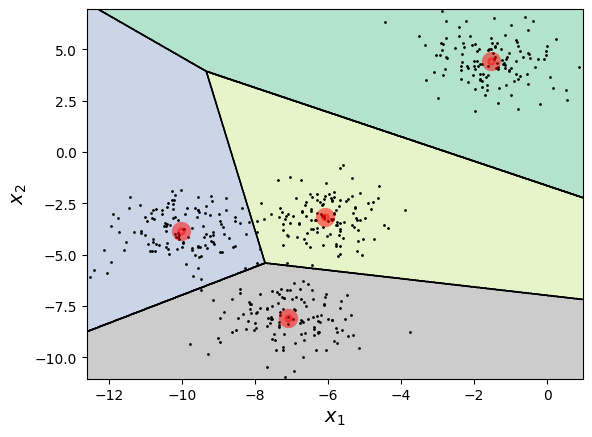

In [ ]:
plot_decision_boundaries(kmeans, x)

Al igual que para calcular las fronteras de decisión, podemos calcular la distancia de cualquier dato u observación (puede ser un dato nuevo!) a los centroides finales de cada cluster. La distancia de cada dato al centro de cada clúster puede calcularse utilizando el método `transform` de `KMeans`.

In [ ]:
nuevos_datos = np.array([[-1.2, 2.2], [-10,0]]) # los valores X, Y de nuevas observaciones
print(kmeans.transform(nuevos_datos))

[[ 2.26124049 10.68673817  7.26147335 11.87531848]
 [ 9.55001545  3.84945226  5.03971637  8.61518792]]


Conocer la distancia a los distintos centroides es una manera de aproximarnos a saber a qué cluster pertenece un dato (o con qué cluster tiene más *afinidad*).

Para saberlo más directamente, podemos usar la función `predict()` de `KMeans`. Predict, nos da la asignación de nuevos datos a los grupos (usa las mismas etiquetas de grupos que ya vimos &ndash; `labels_`.)

In [ ]:
print(kmeans.predict(nuevos_datos))

[0 1]


Otra información que podemos pedirle a `sklearn.KMeans`: podemos ver cuántas interacciones necesitó el algoritmo para converger.

In [ ]:
kmeans.n_iter_

3

Como pueden imaginarse, el algoritmo puede dar diferentes resultados (aun con los mismos datos!), ya que depende de dónde se inicializan los centroides en el primer paso del algoritmo.

**Ejercicio**. Cambien el valor del parámetro `random_state` por cualquier número entero y vean la diferencia en el resultado. Prueben varias veces para ver distintas opciones. En cuántas iteraciones converge en cada caso?

Iteraciones: 2


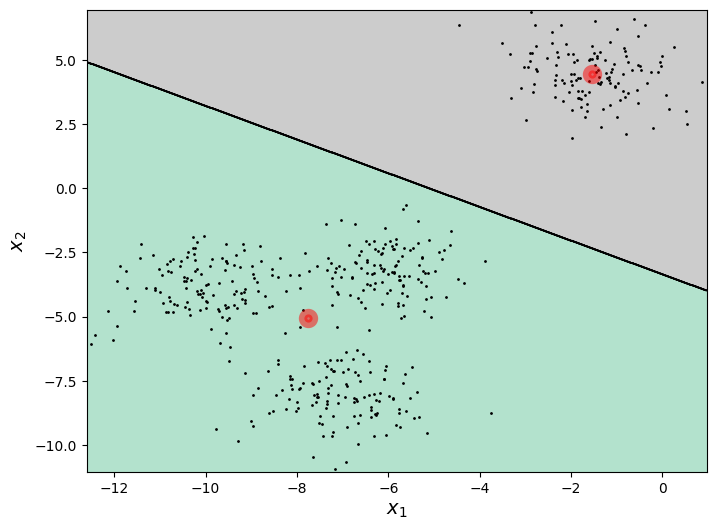

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=1, random_state=1)
kmeans.fit(x)
print("Iteraciones:", kmeans.n_iter_)

plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, x)
plt.show()

Con algunos datasets, los agrupamientos pueden ser inestables.
Para superar esto, el algoritmo puede ejecutarse con muchas semillas aleatorias diferentes de manera automática. El número de veces que se ejecuta está establecido por el argumento `n_init`. De todas las iteraciones, KMeans se queda con el *mejor* resultado (agrupamiento) final.

Ver: [sklearn.cluster.KMeans.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Acá hay aparentemente cuatro grupos o clusters diferentes, pero cómo podemos definir cuál es el mejor valor de `k` (número de clusters) cuando no sabemos cómo se crearon los datos? O son datos desconocidos para nosotros?



## Inercia y Puntaje de un agrupamiento

Un criterio para definir el *mejor agrupamiento* usa como _métrica_ la **inercia**: que es la distancia media de cada dato a su centroide más cercano (al cuadrado, para que los valores negativos no molesten):

$$
I = \sum_{j=1}^K\sum_{i=1}^{n_j} \left(x_i - \mu_j\right)^2\;\;
$$

La inercia para **todo** el agrupamiento (nuestro resultado final), es la sumatoria de distancias para todos los datos de cada cluster, y para todos los clusters. En la fórmula, la primera suma es sobre la cantidad de clusters $K$ y la segunda es sobre los puntos asignados a cada cluster, donde $\mu_j$ es la posición del centroide del cluster $j$.

In [ ]:
kmeans.inertia_

3735.405674929564

Cuanto menor es la inercia, más concentrados están los puntos alrededor de los clusters.

KMeans nos da también un `score` asociado al agrupamiento final. Este es puntaje no es nada más que la inercia cambiada de signo como medida de la performance del algoritmo en este caso (con estos parámetros y con estos datos).

In [ ]:
kmeans.score(x)

-3735.4056749295646

### Ejercicio

Copien las últimas tres celdas y usen KMeans con un número mayor (o menor) clusters (argumento `n_clusters`). Comparen los valores de inercia para diferentes cantidades de clusters. ¿Se les ocurre para qué puede servir esto?

In [ ]:
# ya lo hicimos!

## Número óptimo de clusters

El algoritmo K-means nos pone en la situación del huevo y la gallina. Para ejecutar K-means necesitamos obligadamente darle el número de clusters (parámetro `k`), pero y si justamente eso es lo que queremos averiguar o saber?

Si no conocemos la estructura de nuestros datos y justamente estamos haciendo un análisis exploratorio donde queremos averiguar `k`? Cómo hacemos?

### Usando inercias

La inercia puede usarse para elegir el número de clusters que mejor describe los datos. Para eso, podemos ver cómo mejor (disminuye) la inercia para diferentes cantidades de clusters:

In [ ]:
from sklearn.cluster import KMeans

kmeans_para_varios_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(x)
                        for k in range(1, 10)]
inercias = [model.inertia_ for model in kmeans_para_varios_k]

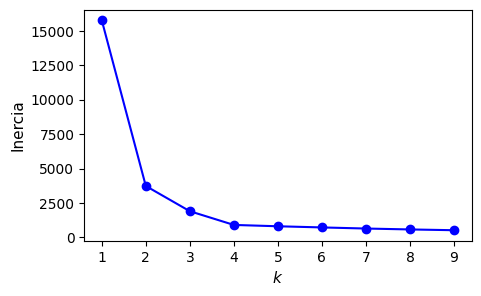

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(range(1, 10), inercias, "bo-")

plt.xlabel("$k$", fontsize=11)
plt.ylabel("Inercia", fontsize=11)

plt.show()

Como tal vez ya habían detectado, la inercia sigue bajando a medida que aumenta el número de clusters. Obviamente, en el límite en que hay tantos clusters como datos, el valor de la inercia será cero.

Pero sí vemos el característico **"codo"**, que muestra un cambio de comportamiento (de pendiente) alrededor de $k=4$. Esto puede indicar que ese es un buen número de clusters. Recuerden que en general, no sabremos cuántos grupos componen _realmente_ el dataset.


Veamos cómo quedan las regiones usando cuatro clusters.

In [ ]:
plt.figure(figsize=(6, 4))
plot_decision_boundaries(kmeans_para_varios_k[4-1], x)
plt.title('k=4', fontsize=11)
plt.show()

### Haciendo análisis de Siluetas

Otro enfoque que se puede usar para analizar los agrupamientos y evaluar cuál puede ser el mejor valor de `k`, es el puntaje de *siluetas* de los clusters.

La silueta de un punto o dato es igual a:

$$(b - a)/\max(a, b)$$

donde $a$ es la distancia media a otros datos del mismo cluster (es la distancia media intra-cluster), y $b$ es la distancia media al cluster más cercano, es decir, la distancia media a datos del siguiente cluster más cercano.

El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que el dato está bien asignado dentro de su propio cluster y lejos de otros clusters, mientras que un coeficiente cercano a 0 significa que un dato está cerca del límite de un cluster. Finalmente coeficientes negativos indican que ese dato puede haber sido asignado al cluster equivocado.

Esta métrica de puntuación está implementada en el paquete `metrics` de `sklearn`. Usémosla para encontrar el número óptimo de clusters.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.6505186632729437

Usémosla igual que antes para encontrar el número óptimo de clusters.

In [ ]:
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_para_varios_k[1:]]

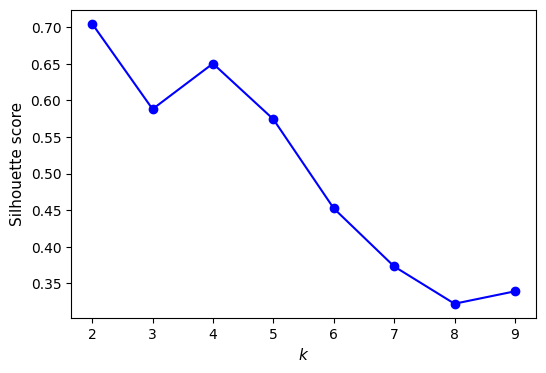

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=11)
plt.ylabel("Silhouette score", fontsize=11)
plt.show()

Para estos datos, cuál es el número óptimo de clusters? Hay uno solo o más?

### Análisis mas detallado de siluetas

En el punto anterior calculamos un único valor de silueta para **todo** un agrupamiento (un agrupamiento es el que se obtiene con un valor de k).

Aunque hayamos evaluado 10 valores diferentes de `k` (de 1 a 10), en todos los casos nos quedamos con un único valor *global* de silueta.

Pero como dijimos más arriba, el valor de silueta se puede calcular para *cada* punto o dato. Veamos cómo es un análisis mas detallado de siluetas. El código se los dejamos a disposición (está oculto):

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


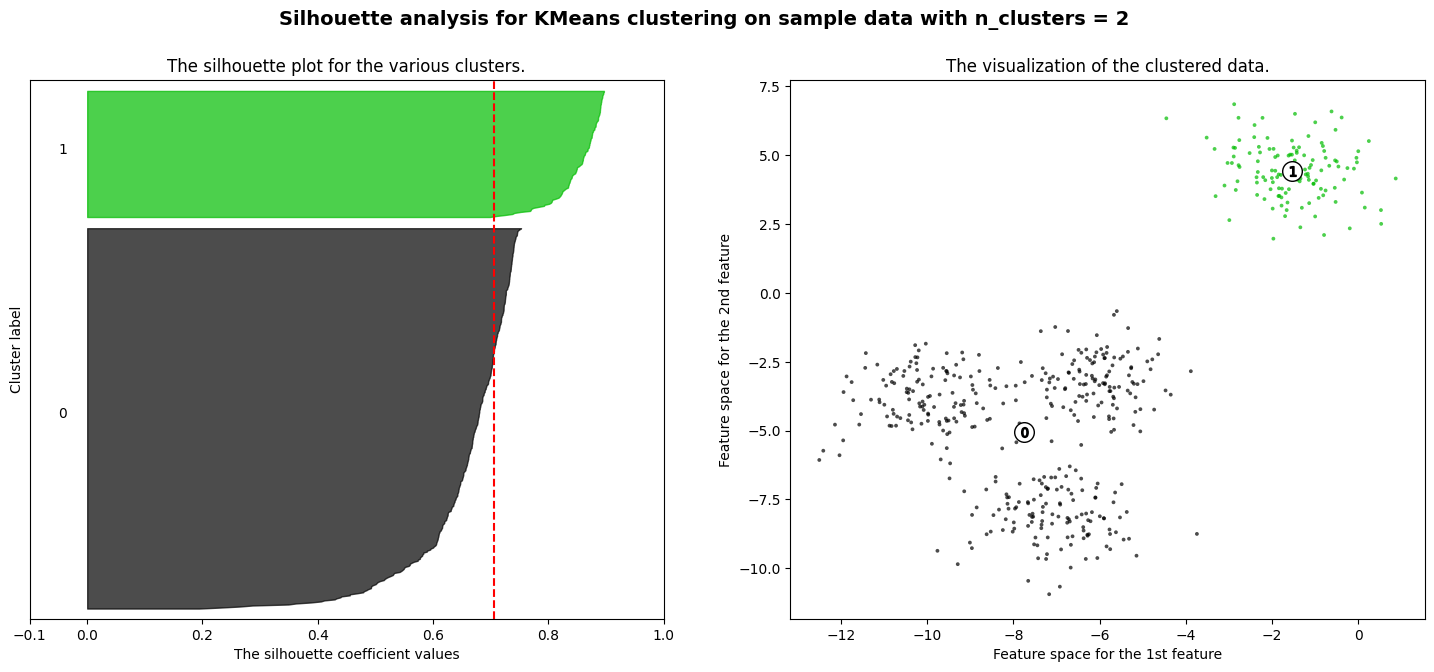

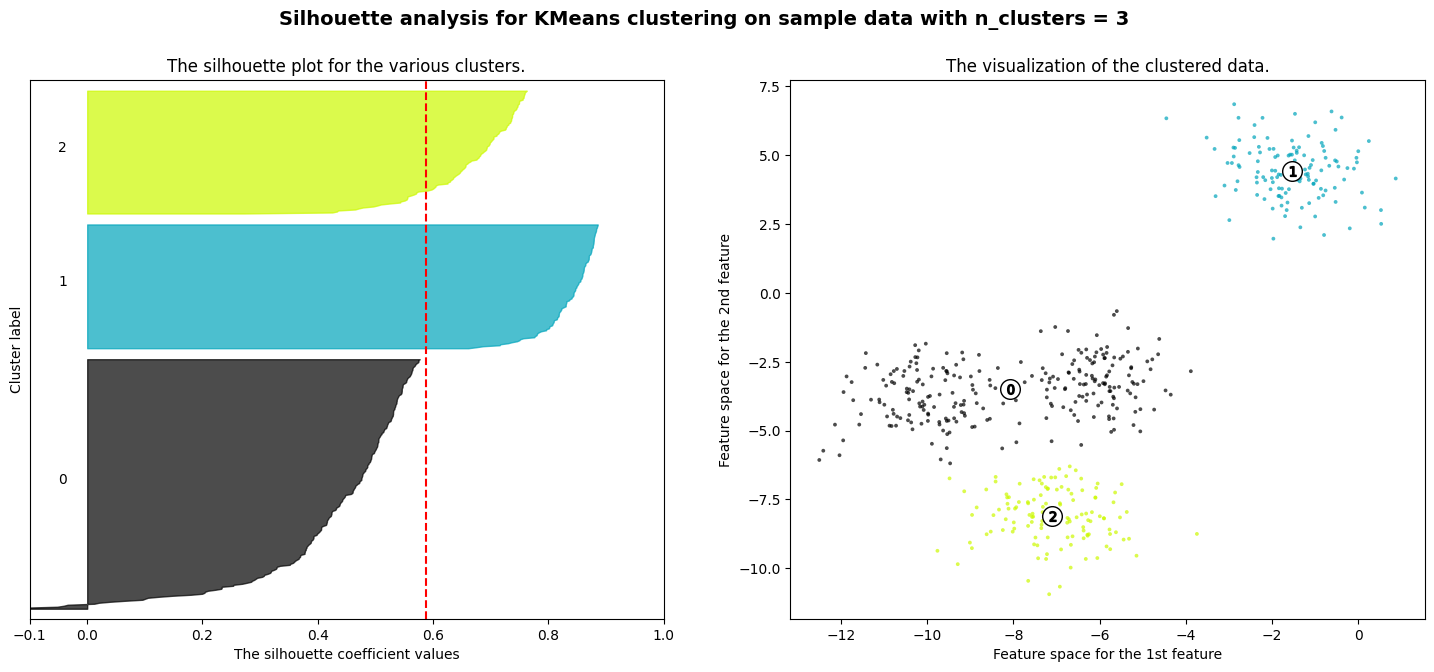

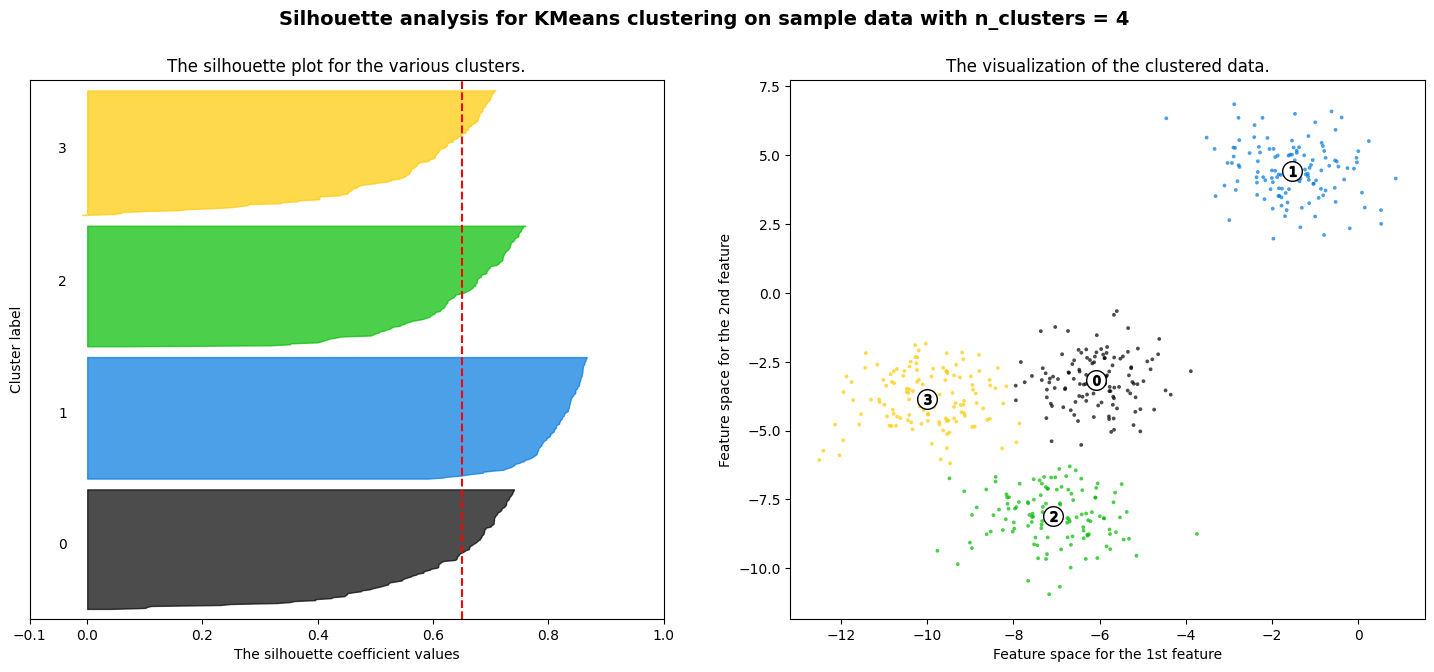

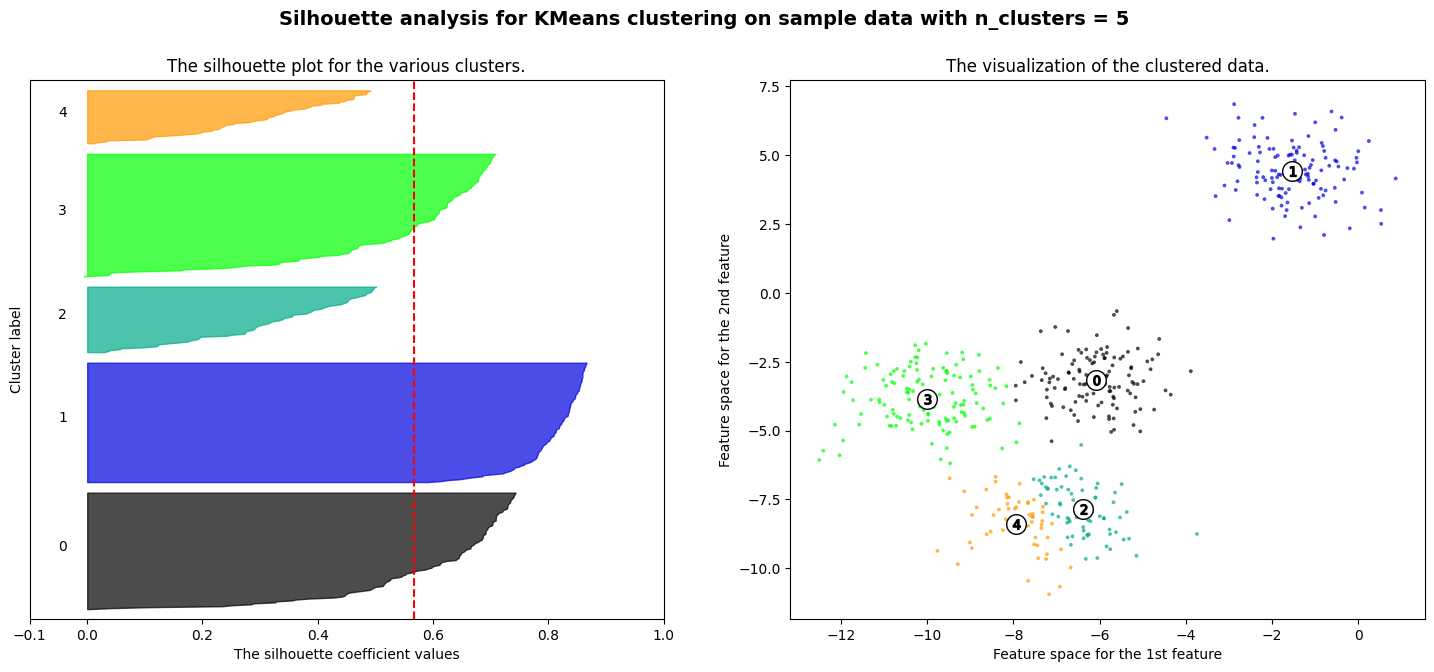

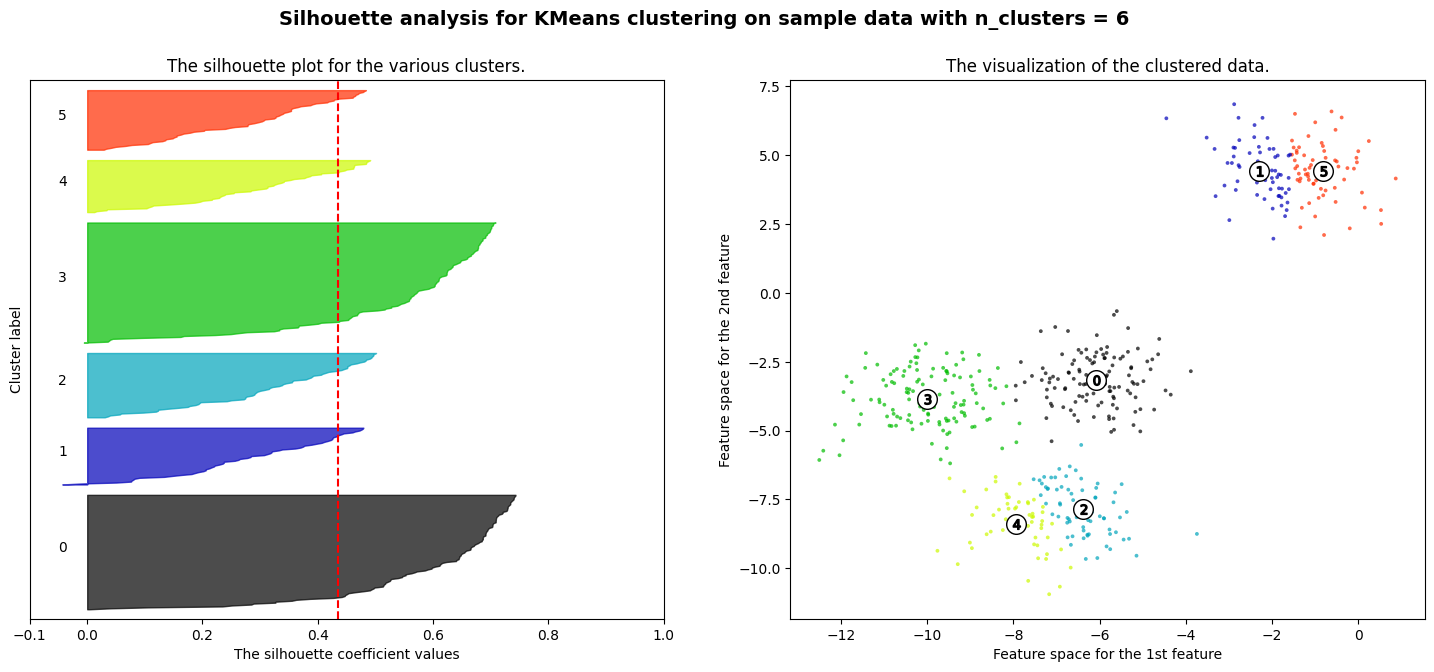

In [ ]:
#@title Código para graficar siluetas
# tomado de: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## K-Means para detección de outliers

Una forma en la que K-Means se puede usar para detectar anomalías es entrenando sobre un conjunto de datos limpios (es decir, que no contiene anomalías) y luego evaluando las distancias de datos nuevos, a los centros de los clusters. Si algun dato es una anomalía (un outlier), probablemente su distancia sea grande a todos los centros.

Probemos esto en un ejemplo de juguete. Incluyamos en el conjunto de testeo que separamos arriba un dato atípico.

In [ ]:
# vamos a introducir un outlier en los datos
# en esta posicion
i_outlier = 250

assert i_outlier < 500, "i_outlier debe ser menor que 500"
# recordemos que nuestro dataset tenia 500 datos

# Coordenadas del outlier (x,y)
x_outlier = np.array([[-8, 10],])

# y lo escondemos en el conjunto de test
test_outlier = np.vstack((x[:i_outlier], x_outlier, x[i_outlier:]))

In [ ]:
x

Ahora hacemos un `transform` para calcular las distancias a los clusters.

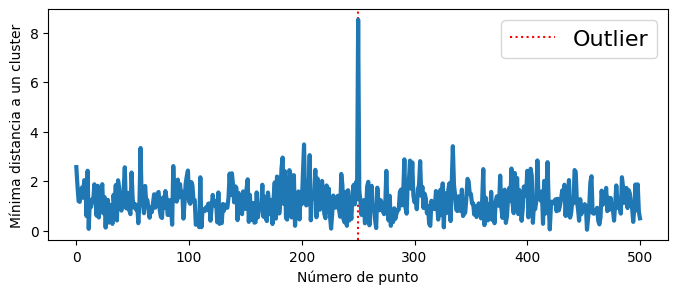

In [ ]:
# Calculamos la distancias
distancias = kmeans.transform(test_outlier)

# Calculamos la distancia más chica
min_distancias = np.min(distancias, axis=1)

# Las graficamos en función del número de punto
plt.figure(figsize=(8, 3))
plt.plot(min_distancias, lw=3)
plt.axvline(i_outlier, ls=':', color='r', zorder=-1, label='Outlier')
plt.xlabel('Número de punto')
plt.ylabel('Mínima distancia a un cluster')
plt.legend(loc=0, fontsize=16)

En efecto, vemos que la mayor distancia mínima (sí, eso) se da en la posición del outlier! Con esta técnica podemos identificar los puntos sospechosos y mirarlos con lupa, o pasarlos a un experto del tema.


Pero hay muchos otros picos. ¿Cómo podemos estar seguros de que no se trata de una fluctuación estadística de un dataset limpio? Una opción es mirar antes el gráfico correspondiente al dataset de entrenamiento. Hacemos lo mismo que arriba.

Text(0, 0.5, 'Mínima distancia a un cluster')

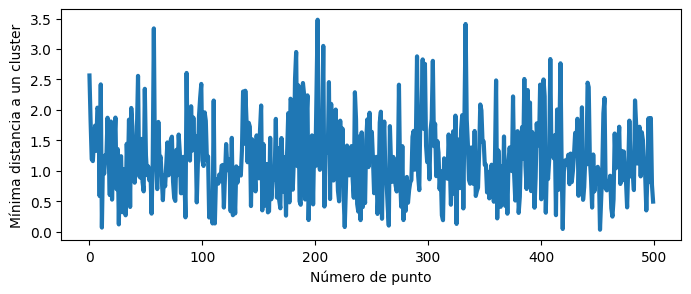

In [ ]:
# Calculamos la distancias
distancias_train = kmeans.transform(x)

# Calculamos la distancia más chica
min_distancias_train = np.min(distancias_train, axis=1)

# Las graficamos en función del número de punto
plt.figure(figsize=(8, 3))
plt.plot(min_distancias_train, lw=3)
plt.xlabel('Número de punto')
plt.ylabel('Mínima distancia a un cluster')

Vemos que ninguno de los puntos del conjunto de datos original tienen un efecto pico tan alto (ese punto que llega a 5 es sospechoso?)

Pero esto es esperable, no? Los datos originales son los que se usaron para encontrar los clusters, entonces es de esperar que los puntos estén más cerca de los centros de los clusters. Mmmm, ¿entonces?

Necesitaríamos otro conjunto de datos?

Vamos a ver con mucho más detalle de qué se trata ese otro conjunto de datos en las próximas clases.

Acá brevemente les dejamos picando la idea: dividir nuestros datos originales en dos: 1) un conjunto de datos para hacer agrupamientos (train), encontrar el mejor `k`, etc; y 2) un conjunto de datos para validar lo que hicimos (test).

In [ ]:
from sklearn.model_selection import train_test_split

# dividimos x en dos: 80% train, 20% test
x_train, x_test = train_test_split(x, test_size=0.2)

# con esto pueden correr todo el mismo código del notebook
# donde el código usa la variable x que tiene los datos
# pueden reemplazar y usar x_train o x_test

In [ ]:
x_train.shape
x_test.shape

(100, 2)

## Otros algoritmos de Clustering.

Hay muchos métodos para hacer clustering. K-Means es uno de los más populares, pero hay muchos otros.

Les proponemos que prueben otros algoritmos en los conjuntos de datos presentados en este notebook.

Otros algoritmos de **clustering** implementados en sklearn [Ver: sklearn.clustering.](https://scikit-learn.org/stable/modules/clustering.html)

![Comparación de algoritmos](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


# Ejercicio

 1. Vuelvan al principio del notebook (`make_blobs`) y cambien la cantidad de datos (`n_samples`), cantidad de clusters (`centers`), y/o dispersión (`cluster_std`) de los clusters de datos que generamos.
 2. Repitan todo el proceso.
 3. Analicen si las conclusiones sobre el número de clusters que se obtienen con la silueta y la inercia condicen con los cambios que hicieron.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN identifica un número de datos (observaciones) a las que llama *centrales* (core) que son los datos que están en regiones de alta densidad. Genera clusters por etiquetado de otros datos al expandirse desde estas regiones de alta densidad. Este método es bueno para datos que contienen cúmulos de densidades similares.

**Referencias:**
 - [Wikipedia](https://es.wikipedia.org/wiki/DBSCAN)
 - [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
 - [sklearn.clustering](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

In [ ]:
# generamos 3 clusters con datos sintéticos

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
x, y = make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=0
)

x = StandardScaler().fit_transform(x)

In [ ]:
y

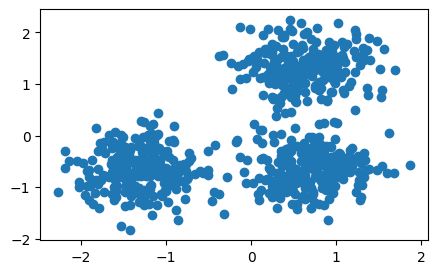

In [ ]:
# veamos los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(x[:, 0], x[:, 1])

Corramos DBSCAN. Los parámetros más importantes de este algoritmo son: `eps` (epsilon) que es la distancia a la que tienen que estar dos datos para ser considerados *vecinos*; y `min_samples` que es el número mínimo de datos que tiene que tener una *vecindad* de datos para que un punto de esa vecindad sea considerado un dato *central* (core).

En conjunto `eps` y `min_samples` ayudan a definir los datos que van a participar en la estimación de *densidad*, que es el concepto clave en este método de clustering.

Un cluster es un conjunto de datos *core* que se construye iterativamente:
 - tomar un dato *central*
 - encontrar todos los vecinos que también son *centrales*
 - encontrar todos los vecinos de los vecinos que también son *centrales*
 - y asi sucesivamente ...

 Un cluster también puede contener datos *no-centrales* (estos son datos que son vecinos de un dato central, pero que no llegan a tener al menos `min_samples` vecinos). Estos son los que suelen estar en los bordes del cluster.

 Finalmente, los outliers son datos que están a una distancia de al menos `eps` de un dato central.

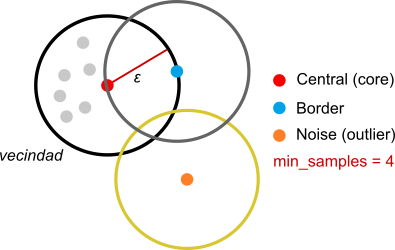

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=10).fit(x)
clusters = db.labels_

# veamos los clusters
print(clusters)

Hay algo raro? Cuántos clusters hay?

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Numero de clusters: %d" % n_clusters_)
print("Número de outliers (datos ruidosos): %d" % n_noise_)

Numero de clusters: 1
Número de outliers (datos ruidosos): 0


Text(0.5, 1.0, 'Estimated number of clusters: 3')

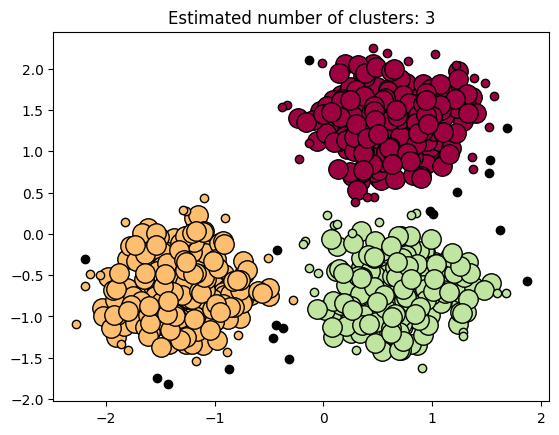

In [ ]:
#@title Codigo para graficar core vs noise y densidad
# adaptado de https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import matplotlib.cm as cm
unique_labels = set(clusters)
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = clusters == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")

In [ ]:
from sklearn import metrics
score_silueta = metrics.silhouette_score(x, clusters)
print(score_silueta)

0.6255247640253795


### Ejercicio

Cómo encontrar el mejor valor de `eps`? Evaluar distintos valores de este parámetro y graficar el score de silueta en cada caso.

In [ ]:
import numpy as np
valores_epsilon = np.arange(0.1, 1.1, 0.01)

dbscan_para_varios_eps = [DBSCAN(eps=i, min_samples=10).fit(x)
                           for i in valores_epsilon]

In [ ]:
valores_epsilon

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
dbscan_para_varios_eps[2].eps

In [ ]:
import numpy as np

# array numpy vacio para guardar dos valores
# eps, score_silueta
scores_siluetas = np.empty((0,2))

for dbscan in dbscan_para_varios_eps:
  clusters = dbscan.labels_ # numero de clusters
  eps = dbscan.eps          # valor eps

  # si hay 1 solo cluster al final == no hubo clustering!
  if len(set(clusters)) != 1:
    nueva_fila = [eps, metrics.silhouette_score(x, clusters)]
    scores_siluetas = np.vstack((scores_siluetas, nueva_fila))

print(scores_siluetas)

Text(0, 0.5, 'Silhouette score')

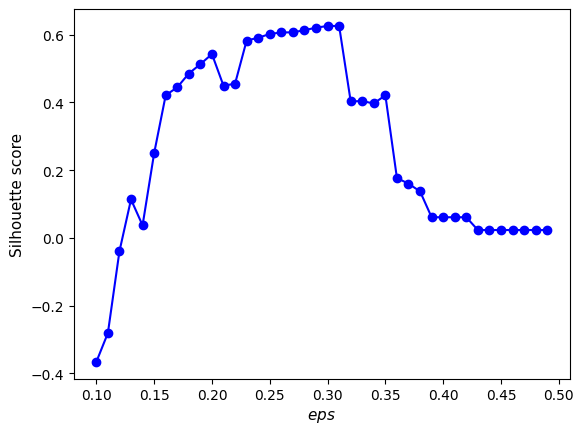

In [ ]:
import matplotlib.pyplot as plt

plt.plot(scores_siluetas[:,0], scores_siluetas[:,1], "bo-")
plt.xlabel("$eps$", fontsize=11)
plt.ylabel("Silhouette score", fontsize=11)

### Metricas para evaluar clustering

Sklearn nos da varias métricas adicionales para evaluar clustering: homogeneidad, completitud, etc.

En estos casos, necesitamos dos conjuntos de datos de *etiquetas* o clustering de datos: 1) el clustering o etiquetado **verdadero** y 2) el clustering o etiquetado obtenido por algún método (kmeans, dbscan, etc).

El clustering o etiquetado **verdadero** implica conocer de antemano la clasificación o estructura de los datos, por lo que en este caso el

Referencias:
 - [homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)
 - [completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html)
 - [v-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html)
 - [rand-index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

Recordemos que en este notebook, somos nosotros los que estamos generando datos sintéticos, y por lo tanto *sabemos* cual es el número verdadero de clusters. De hecho `make_blobs` nos genera el etiquetado **verdadero** en nuestra variable `y`.

Asi que podemos contrastar los valores **verdaderos** de asignación de clusters en `y` con los que obtuvimos con ej. DBSCAN.

In [ ]:
# y = clusters (etiquetas) verdaderas, obtenidas de make_blobs
# clusters = db.labels_ obtenidas de dbscan
print(f"Homogeneidad: {metrics.homogeneity_score(y, clusters):.3f}")
print(f"Completitud: {metrics.completeness_score(y, clusters):.3f}")
print(f"V-score: {metrics.v_measure_score(y, clusters):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, clusters):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, clusters):.3f}")
#print(f"Silhouette Coefficient: {metrics.silhouette_score(x, clusters):.3f}")

En situaciones con datos reales (no sintéticos), uno puede contar con un dataset de entrenamiento o un dataset curado por algún experto, donde uno conoce las etiquetas.

Este etiquetado se puede usar para contrastar con el obtenido por algun metodo (ej para ajustar parámetros de clustering).